Load and process data


In [2]:
import pandas as pd

def merge_dfs(df1, df2):
    return pd.concat(axis=0, objs=[df1, df2])

def read_motor_csv(name, state):
    df = pd.read_csv(name, \
    names=['row_num', 'sensor_id', 'acc_x', 'acc_y', 'acc_z',\
            'gyr_x', 'gyr_y', 'gyr_z', 'datetime'], sep=';')
    
    df['state'] = state
    df['acc_x'] = df['acc_x'] / 2715
    df['acc_y'] = df['acc_y'] / 2715
    df['acc_z'] = df['acc_z'] / 2715
    df['gyr_x'] = df['gyr_x'] / 2715
    df['gyr_y'] = df['gyr_y'] / 2715
    df['gyr_z'] = df['gyr_z'] / 2715
    df['datetime'] = pd.to_datetime(df['datetime'])
    return df

main_df = read_motor_csv('5hz_desbalance.csv', 'unbalanced')
main_df = merge_dfs(main_df, read_motor_csv('7hz.csv', 'balanced'))
main_df = merge_dfs(main_df, read_motor_csv('10hz_desbalan.csv', 'unbalanced'))
main_df = merge_dfs(main_df, read_motor_csv('10hz.csv', 'balanced'))
main_df = merge_dfs(main_df, read_motor_csv('15hz_desbalan.csv', 'unbalanced'))
main_df = merge_dfs(main_df, read_motor_csv('15hz.csv', 'balanced'))
main_df = merge_dfs(main_df, read_motor_csv('20hz_50g.csv', 'balanced')) # este es balanced?
main_df = merge_dfs(main_df, read_motor_csv('20hz_desbalan.csv', 'unbalanced'))
main_df = merge_dfs(main_df, read_motor_csv('20hz.csv', 'balanced'))
main_df = merge_dfs(main_df, read_motor_csv('señal_impulso.csv', 'unbalanced')) # este cuenta como unbalanced?

# print(main_df)


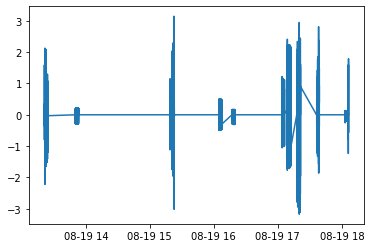

In [5]:
# general data analyisis
import matplotlib.pyplot as plt

main_df = main_df.sort_values('datetime')
plt.plot(main_df['datetime'], main_df['acc_x'])
plt.savefig('asd.png')

In [12]:

# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = main_df.drop(axis=0, columns=['datetime'])
X = df.drop('state', axis=1)  # Features
y = df['state']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42, max_features=6)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9610721279373368


In [3]:
# svm
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
df = main_df.drop(axis=0, columns=['datetime'])
xx = df.drop('state', axis=1)  # Features
y = df['state']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(xx, y, test_size=0.2, random_state=42)
model = svm.SVC(kernel='linear', C=1)
# For regression
# model = svm.SVR(kernel='linear', C=1)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

In [3]:
# naive bayes
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn import datasets

# Load a dataset for illustration (you can replace this with your own dataset)
df = main_df.drop(columns=['datetime'], axis=0)
X = df.drop('state', axis=1)  # Features
y = df['state']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = naive_bayes_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.5894745430809399
Classification Report:
              precision    recall  f1-score   support

    balanced       0.56      0.89      0.69     61814
  unbalanced       0.72      0.28      0.40     60746

    accuracy                           0.59    122560
   macro avg       0.64      0.59      0.55    122560
weighted avg       0.64      0.59      0.55    122560



In [ ]:
# rms

# peaks

In [ ]:
# fft
import numpy as np
import matplotlib.pyplot as plt

# Generate example acceleration data (replace this with your own data)
sampling_rate = 1000  # 1000 samples per second
total_time = 10  # 10 seconds
t = np.linspace(0, total_time, int(sampling_rate * total_time), endpoint=False)  # Time array
acceleration_data = 2.0 * np.sin(2 * np.pi * 5 * t) + 1.5 * np.sin(2 * np.pi * 20 * t)

# Compute FFT
fft_result = np.fft.fft(acceleration_data)
frequencies = np.fft.fftfreq(len(acceleration_data), 1/sampling_rate)

# Plot the original signal and its FFT
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, acceleration_data)
plt.title('Original Acceleration Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration')

plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.title('FFT of Acceleration Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

Show results

In [ ]:
# figure, axis = plt.subplots(2, 1)

# axis[0].plot(datetimes, acc_x)
# axis[1].plot(datetimes, df1['acc_x'])
# plt.show()